## Starting point
Begin with 

\begin{align}
 \min\quad  &\vec{x}^\top (\mathbf{N}_1^\top \mathbf{Q}_\text{obj}\mathbf{N}_1) \vec{x} + 2\vec{x}^\top
(\mathbf{N}_1^\top \mathbf{Q}_\text{obj} \vec{z}_1^*) \\
 s.t.\quad &\vec{x}^\top \mathbf{N}_3^\top \mathbf{N}_3 \vec{x} = c.
\end{align}

## Goal
Diagonalize the constraint by changing variables.

## Process: Eig
The quadratic constraint is no longer a norm constraint. This can be corrected by a change of variables. First, perform an eigendecomposition $\mathbf{N}_3^\top \mathbf{N}_3 = \mathbf{UDU}^\top$ and let $\hat{\vec{x}} = \mathbf{U}^\top \vec{x}$. The constraint is diagonal in terms of $\hat{\vec{x}}$:

\begin{equation}
 \vec{x}^\top \mathbf{N}_3^\top \mathbf{N}_3 \vec{x} = \hat{\vec{x}}^\top \mathbf{D}\hat{\vec{x}}
\end{equation}

where $\mathbf{S}$ is diagonal with at most $n_t$ nonzero elements. The right side may be expanded into

\begin{equation}
\begin{bmatrix}
\hat{\vec{x}}_1^\top & \hat{\vec{x}}_2^\top \end{bmatrix}
\begin{bmatrix} \hat{\mathbf{D}} & \mathbf{0} \\ \mathbf{0} & \mathbf{0} \end{bmatrix}
\begin{bmatrix}
\hat{\vec{x}}_1 \\ \hat{\vec{x}}_2
\end{bmatrix}.
\end{equation}

The second step is a change of variables from $\hat{\vec{x}}$ to $\vec{w}$ where

\begin{align}
 \begin{bmatrix} \vec{w}_1 \\ \vec{w}_2 \end{bmatrix} &=
\begin{bmatrix} \sqrt{\hat{\mathbf{D}}} & \mathbf{0} \\ \mathbf{0} & \mathbf{I} \end{bmatrix}
\begin{bmatrix} \hat{\vec{x}}_1 \\ \hat{\vec{x}}_2 \end{bmatrix} = \mathbf{K}\hat{\vec{x}}.
\end{align}

Combine the two steps to relate $\vec{x}$ and $\vec{w}$:
\begin{equation}
\vec{w} = \mathbf{KU}^\top \vec{x}.
\end{equation}

In terms of $\vec{w}$, we have the form of a norm:

\begin{equation}
\hat{\vec{x}}^\top \mathbf{D}\hat{\vec{x}} = \hat{\vec{x}}_1^\top \hat{\mathbf{D}}^{1/2}\hat{\mathbf{D}}^{1/2}\hat{\vec{x}}_1
= \vec{w}_1^\top \vec{w}_1~.
\end{equation}

The problem overall becomes

\begin{align}
\min\quad &\vec{w}^\top \mathbf{B}\vec{w} + \vec{w}^\top \vec{b} \\
 s.t.\quad &\vec{w}_1^\top \vec{w}_1 = c,
\end{align}

where

\begin{align*}
\mathbf{B} &= \mathbf{K}^{-1}\mathbf{U}^\top \mathbf{N}_1^\top \mathbf{Q}_\text{obj} \mathbf{N}_1 \mathbf{U}\mathbf{K}^{-1} \\
\vec{b} &= 2 \mathbf{K}^{-1}\mathbf{U}^\top
\mathbf{N}_1^\top \mathbf{Q}_\text{obj} \vec{z}_1^*.
\end{align*}

The constraint takes the form of a norm once more.

## Process: SVD
The quadratic constraint is no longer a norm constraint. This can be corrected by a change of variables. Let $\mathbf{N}_3^\top = \mathbf{USV}^\top$ and $\hat{\mathbf{x}}=\mathbf{U}^\top\mathbf{x}$. The constraint becomes

\begin{equation}
\vec{x}^\top  \mathbf{US}\mathbf
{S}^\top\mathbf{U^\top} \vec{x} = \hat{\mathbf{x}}^\top\mathbf{SS}^\top \hat{\mathbf{x}}=c,
\end{equation}
where $\mathbf{S}$ is diagonal with at most $n_t$ nonzero elements. Expand the right side:

\begin{equation}
\begin{bmatrix}
\hat{\vec{x}}_1^\top & \hat{\vec{x}}_2^\top \end{bmatrix}
\begin{bmatrix} \hat{\mathbf{S}}^2 & \mathbf{0} \\ \mathbf{0} & \mathbf{0} \end{bmatrix}
\begin{bmatrix}
\hat{\vec{x}}_1 \\ \hat{\vec{x}}_2
\end{bmatrix}.
\end{equation}

Now change of variables from $\hat{\vec{x}}$ to $\vec{w}$, where

\begin{align}
\begin{bmatrix} \vec{w}_1 \\ \vec{w}_2 \end{bmatrix} &=
\begin{bmatrix} \hat{\mathbf{S}} & \mathbf{0} \\ \mathbf{0} & \mathbf{I} \end{bmatrix}
\begin{bmatrix} \hat{\vec{x}}_1 \\ \hat{\vec{x}}_2 \end{bmatrix} = \mathbf{K}\hat{\vec{x}}.
\end{align}

Combine the two steps to relate $\vec{x}$ and $\vec{w}$:

\begin{equation}
\vec{w} = \mathbf{KU}^\top \vec{x}.
\end{equation}

In terms of $\vec{w}$, we have

\begin{align}
 \min\quad &\vec{w}^\top \mathbf{B}\vec{w} + \vec{w}^\top \vec{b} \\
 s.t.\quad &\vec{w}_1^\top \vec{w}_1 = c,
\end{align}

where
\begin{align*}
\mathbf{B} &= \mathbf{K}^{-1}\mathbf{U}^\top \mathbf{N}_1^\top \mathbf{Q}_\text{obj} \mathbf{N}_1 \mathbf{U}\mathbf{K}^{-1} \\
\vec{b} &= 2 \mathbf{K}^{-1}\mathbf{U}^\top
\mathbf{N}_1^\top \mathbf{Q}_\text{obj} \vec{z}_1^*.
\end{align*}
The constraint has a norm structure once more.

## Numerical details
The matrix $\mathbf{N}_3$ is $n_t$-by-$n_t n_r$, quite flat.

In the Eig case we apply `eig()` to the Gram matrix. The initial multiplication $\mathbf{N}_3^\top\mathbf{N}_3$ takes $O(n_t n_r)(n_t)(n_t n_r)$ operations ([source][1]) and [roughly squares the condition number][2], reducing accuracy. SVD avoids this computation; it should be cheaper and more accurate.

Going one step further, it should be cheaper to request the $n_t$ nonzero singular values and corresponding vectors using the iterative `svds()`, then complete the orthogonal basis using Gram-Schmidt. But I need a better way to do this than tacking on standard basis vectors and using `qr()` to complete the basis (this method is too expensive). Perhaps [this Gram-Schmidt implementation][4] would work?

[Sweet paper on SVD algorithm used in LAPACK][3].

[1]: https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations
[2]: http://www.math.pitt.edu/~sussmanm/2071Spring08/lab09/index.html
[3]: http://www.netlib.org/lapack/lawnspdf/lawn03.pdf
[4]: https://github.com/jcrudy/GramSchmidt.jl

## Why are left singular vectors more dense than Eigenvectors?
[GESDD uses a divide-and-conquor algorithm][1]. It splits the dense matrix in half, then uses the [QR algorithm][2] to find the SVD of each half. The halves are then "glued together" by solving a "special rational equation." See [this paper][3] for details. Divide-and-conquer leaves an unmistakable trace on the matrix of left singular vectors, as seen in the figure below.

<img src='../images/eig_vs_svd_basis.png' width=600px>

Apparently, the [LAPACK Eigendecomposition][4] takes a similar divide-and-conquer approach. We clearly see six horizontal blocks in the Eigenvectors of the same height as the blocks in the matrix of left singular vectors.

[1]: http://www.netlib.org/utk/people/JackDongarra/etemplates/node193.html
[2]: https://en.wikipedia.org/wiki/QR_algorithm
[3]: http://www.netlib.org/lapack/lawnspdf/lawn88.pdf
[4]: http://www.netlib.org/lapack/lapack-3.1.1/html/dgeevx.f.html

## Iterative methods: eigs and svds
In my case, I know my flat matrix has full row rank. Thus, I can ask `eigs` or `svds` for $n_t$ components of the decomposition, then use Gram-Schmidt to complete the basis. (I must complete the basis because the objective must be rotated along with the constraint.)

This raises the question: how sparse are the bases that result from using `eigs` and `svds`? I will save an instance of the $\mathbf{N}_3$ matrix to disk, load it up here, and experiment.

`eigs` and `svds` produce vectors with the same sparsity pattern. The vectors are not identical, however. Now I need to complete the basis for each:

## Comparing `eig()`, `svd()`, `eigs()`, `svds()`

The following function has the same type signature regardless of the value of keyword argument `alg`.

In [18]:
"""
`A` is flat.
"""
function vals_and_vecs(
    A   :: AbstractArray,
    alg :: AbstractString
    )
    nt,nrnt = size(A)
    
    if alg == "eig"
        D,U = eig(full(A'A))
        D = round(D,10)
        K = ones(length(D))
        K[find(D)] = sqrt(D[find(D)])
        Kinv = 1./K
        U = sparse(round(U,10))
        
    elseif alg == "svd"
        U,S,V = svd(full(A'),thin=false)
        U = sparse(round(U,10))
        K = [S;ones(nrnt-nt)]
        Kinv = 1./K
        
    elseif alg == "eigs"
        D,U = eigs(A'A,nev=nt)
        # augment with zeros, take qr:
        U = qrfact([sparse(round(U,10)) spzeros(nrnt,nrnt-nt)])
        # extract Q to obtain complete orthogonal basis:
        U = sparse(SparseMatrix.SPQR.qmult(SparseMatrix.SPQR.QX,U,
                    SparseMatrix.CHOLMOD.Dense(eye(size(U)...))))
        K = [sqrt(D);ones(nrnt-nt)]
        Kinv = 1./K
        
    elseif alg == "svds"
        U,S,V = svds(A',nsv=nt)
        # augment with zeros, take qr:
        U = qrfact([sparse(round(U,10)) spzeros(nrnt,nrnt-nt)])
        # extract Q to obtain complete orthogonal basis:
        U = sparse(SparseMatrix.SPQR.qmult(SparseMatrix.SPQR.QX,U,
                    SparseMatrix.CHOLMOD.Dense(eye(size(U)...))))
        K = [S;ones(nrnt-nt)]
        Kinv = 1./K
    end
    return U,Kinv
end

vals_and_vecs (generic function with 1 method)

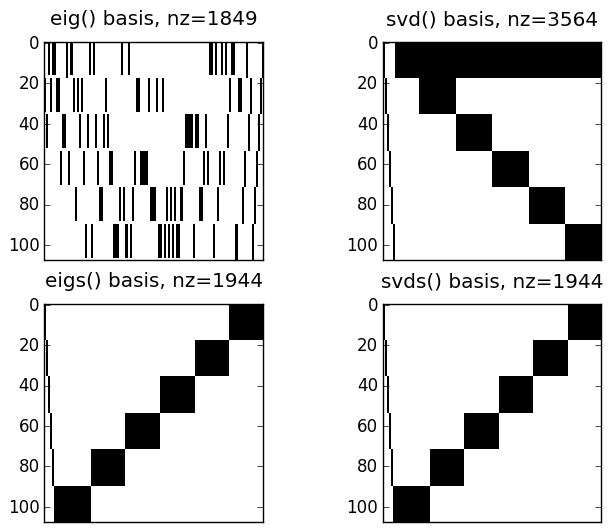

(Any[],Any[])

In [26]:
using JLD
using PyPlot
PyPlot.svg(true)

N3 = load("../data/N3.jld")["N3"]

# compare sparsity
Ueig,Keig = vals_and_vecs(N3,"eig")
Usvd,Ksvd = vals_and_vecs(N3,"svd")
Ueigs,Keigs = vals_and_vecs(N3,"eigs")
Usvds,Ksvds = vals_and_vecs(N3,"svds")

subplot(2,2,1)
title("eig() basis, nz=$(nnz(Ueig))")
yticks(linspace(0,108,7))
spy(Ueig)
xticks([])

subplot(2,2,2)
title("svd() basis, nz=$(nnz(Usvd))")
yticks(linspace(0,108,7))
spy(Usvd)
xticks([])

subplot(2,2,3)
title("eigs() basis, nz=$(nnz(Ueigs))")
yticks(linspace(0,108,7))
spy(Ueigs)
xticks([])

subplot(2,2,4)
title("svds() basis, nz=$(nnz(Usvds))")
yticks(linspace(0,108,7))
spy(Usvds)
xticks([])

In [ ]:
# compare solution time
using JLD, PyPlot
PyPlot.svg(true)
N3 = load("../data/N3.jld")["N3"]
reps = 30
tEig = Vector{Tuple{Float64,Int64,Float64}}()
tSvd = Vector{Tuple{Float64,Int64,Float64}}()
tEigs= Vector{Tuple{Float64,Int64,Float64}}()
tSvds= Vector{Tuple{Float64,Int64,Float64}}()

for rep in 1:reps
    push!(tEig, @timed(vals_and_vecs(N3,"eig" ))[2:end-1])
    push!(tSvd, @timed(vals_and_vecs(N3,"svd" ))[2:end-1])
    push!(tEigs,@timed(vals_and_vecs(N3,"eigs"))[2:end-1])
    push!(tSvds,@timed(vals_and_vecs(N3,"svds"))[2:end-1])
end

EigTime = [t[1] for t in tEig]
SvdTime = [t[1] for t in tSvd]
EigsTime = [t[1] for t in tEigs]
SvdsTime = [t[1] for t in tSvds]

EigMem = [t[2] for t in tEig]/1e6
SvdMem = [t[2] for t in tSvd]/1e6
EigsMem = [t[2] for t in tEigs]/1e6
SvdsMem = [t[2] for t in tSvds]/1e6

In [25]:
round([mean(EigTime) mean(SvdTime) mean(EigsTime) mean(SvdsTime);
mean(EigMem) mean(SvdMem) mean(EigsMem) mean(SvdsMem)]',4)

4x2 Array{Float64,2}:
 0.0035  0.6891
 0.0015  0.3202
 0.0016  0.7603
 0.0014  0.727 

| Alg    | Time (ms) | Allocation (MB) |
|--------|:---------:|:---------------:|
| eig()  |    3.5    |       0.69      |
| svd()  |    1.5    |       **0.32**      |
| eigs() |    1.6    |       0.76      |
| svds() |    **1.4**    |       0.73      |

The top two methods operate on dense matrices, and `eig()` has an additional matrix multiplication. `eig()` takes twice as much space because $N_3^\top N_3$ is a square, dense matrix of size $n_rn_t$. `eigs()` and `svds()` are very similar, but `svds()` is slightly faster and requires a bit less space. Probably this is due to the extra matrix multiplication needed for `eigs()`.

Cite the paper behind the LAPACK algorithm called by `svds()`. Do MATLAB, SciPy, and Julia use the exact same LAPACK algorithm?

In [27]:
methods(svds)

# 4 methods for generic function "svds":
svds{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64}}(A::AbstractArray{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},2}) at linalg/arnoldi.jl:265
svds(A::AbstractArray{BigFloat,2}) at linalg/arnoldi.jl:266
svds{T}(A::AbstractArray{T,2}) at linalg/arnoldi.jl:268
svds(A) at linalg/arnoldi.jl:271